### This Lab is open from 6 am Tuesday 9/29 to 11:59 pm on Friday 10/2

We will use the same baseball data set for this lab.
Here are the details for your reference.
This dataset contains data concerning a baseball team's performance in a given year. It has the following variables:

Team: A code for the name of the team

League: The Major League Baseball league the team belongs to, either AL (American League) or NL (National League)

Year: The year of the corresponding record

RS: The number of runs scored by the team in that year

RA: The number of runs allowed by the team in that year

W: The number of regular-season wins by the team in that year

OBP: The on-base percentage of the team in that year

SLG: The slugging percentage of the team in that year

BA: The batting average of the team in that year

Playoffs: Whether the team made the playoffs in that year (1 for yes, 0 for no)

RankSeason: Among the playoff teams in that year, the ranking of their regular season records (1 is best)

RankPlayoffs: Among the playoff teams in that year, how well they fared in the playoffs. The team winning the World Series gets a RankPlayoffs of 1.

G: The number of games a team played in that year

OOBP: The team's opponents' on-base percentage in that year

OSLG: The team's opponents' slugging percentage in that year

### Points: 15 + 20 + 20 = 50


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1
Pivot Table in Pandas.
A pivot table is a data processing tool used to query, organize, and summarize data or information between spreadsheets, tables, or databases. Many companies and software vendors use the generic pivot table term. PivotTable, Microsoft branded and trademarked version, is used in most Excel products. We will use PivotTable in pandas. A pivot table is useful when analyzing a large amount of data, as it allows users to apply specific criteria to summarize, organize and reorganize data tables, and create reports. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Upload the baseball.csv data and remove 4 variables that have a high number of null values. Find the pivot table of the data. Explain why we'd want to create a table like this (meaning: In what way is this information on the pivot table useful?)

In [2]:
# You will use the data you obtained  in problem 1 by removing 4 columns for the rest of the problems.
bb = pd.read_csv('baseball.csv', decimal = ',')
bb.isna().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [3]:
bb = bb.drop(columns=['RankSeason','RankPlayoffs','OOBP','OSLG'])
bb.dtypes

Team        object
League      object
Year         int64
RS           int64
RA           int64
W            int64
OBP         object
SLG         object
BA          object
Playoffs     int64
G            int64
dtype: object

In [4]:
bb['OBP'] = bb['OBP'].astype(float)
bb['SLG'] = bb['SLG'].astype(float)
bb['BA'] = bb['BA'].astype(float)
bbpiv = pd.pivot_table(bb, values=['RS','RA','W','OBP','SLG','BA','Playoffs', 'G'], index=['League', 'Team'], aggfunc={np.mean})

It easily organizes the information where it is categorized and easy to work with.

### Problem 2
Correlation coefficient: We have talked about correlation and what it means in our lecture. Correlation coefficent is a number that measures how two columns are correlated. There are many kinds of correlation coefficients. We will use Pearson's Correlation coefficient. Given that the variables x and y have data points $x_1, x_2,..., x_n$ and $y_1, y_2,.., y_n$ then the correlation coefficient is defined by $r_{xy}=\dfrac{\displaystyle{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}}{\sigma_x\, \sigma_y}$. The number
$r_{xy}$ is the correlation coefficient. It's value ranges from -1 to 1. Correlation coefficent of -1 means highest possible negative correlation, 0 means no correlation and 1 means highest possible positive correlation.
$\bar{x}$ and $\bar{y}$ are means of x and y respectively. Here, $\sigma_x$ and $\sigma_y$  are standard deviations of x and y, respectively. You do not have to worry about the complicated looking formula. We will use pandas to find the correlation. Read about corr function here. https://www.w3resource.com/pandas/dataframe/dataframe-corr.php

In [5]:
bb.corr(method='pearson')

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.009287
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,0.075195
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,-0.023369
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,0.105309
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.016563
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.036770
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.019886
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,0.022208
G,0.009287,0.075195,-0.023369,0.105309,0.016563,0.036770,0.019886,0.022208,1.000000


Find correlations of all the variables with all the variables.  Find out how to read a correlation table and answer the following. 

(a) Which two different variables are highly negatively correlated?

(b) Which two different variables are highly positively correlated?

(c) Which two different variables are least correlated?

(d) Why does the output matrix has 1 in the diagonal?

a) RA and w have the lowest negative Pearson's correlation coefficient of -0.532394, so they have the strongest negative relationship between two different variables.  
b) RS and SLG have the highest positive Pearson's correlation coefficient of 0.918740, so they have the strongest positive relationship between two different variables.  
c) It appears G and Year are the least correlated with a Pearson's correlation coefficient of only 0.009287  
d) Because each variable is perfectly correlated with itself

### Problem 3
Pairwise plot and Heatmap: Pair plot is the scatterplot of every two pairs of variables in the data. A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. The first dimension values appear as rows of the table, while the table's columns represent the values of the second dimension. The color value of the cells is proportional to the number of measurements that match the dimensional values. This enables you to identify incidence patterns quickly and to recognize anomalies.
Heatmap is a very popular graphing technique. You see it everywhere, from weather data analysis to web page analytics. Read more following the links here.
https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

a) Find the pair plot of the baseball data frame and make a few observations.

b) Plot the correlation heatmap and make a few observations.

a) After viewing the plot, I decided to drop three of the columns that did not show almost any correlation. Most of the variables have positive relationships with few outliers. RS, OBP, SLG, and BA all appear to have strong positive relationships with each other. RA and W is the only significant negative relationship
b) The heat map also shows mostly positive relationships, especially between those four variables. RA and W seem to have little correlation with most of the variables and a negative relationship with each other.

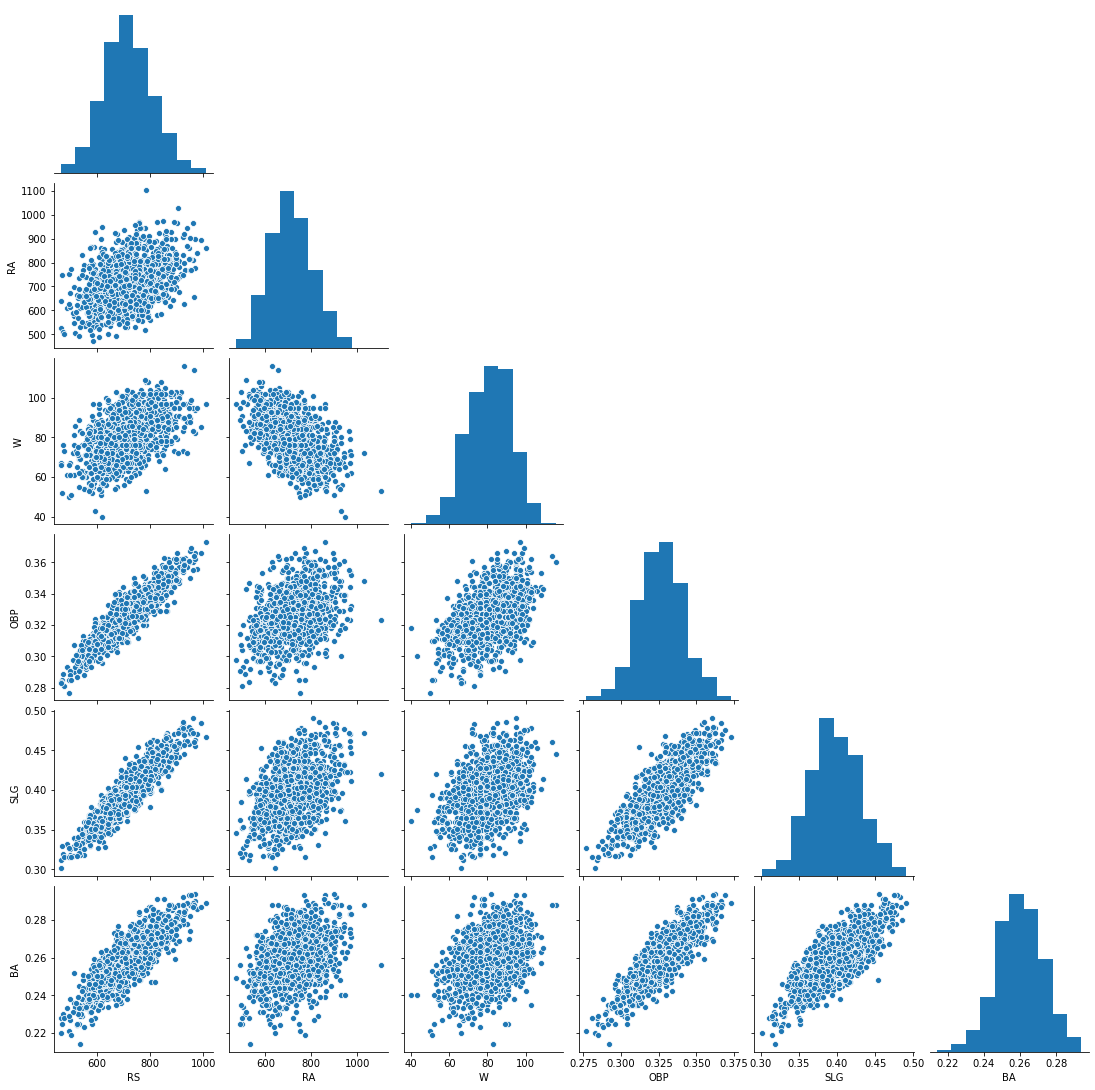

In [6]:
plotbb = bb.drop(columns=['Year','Playoffs','G'])
sns.pairplot(plotbb, corner=True)

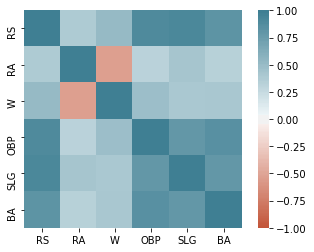

In [7]:
sns.heatmap(plotbb.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)